# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import math 


In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [3]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [4]:
#your code here
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [5]:
#your code here
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [6]:
#your code here
spaceship.dropna(inplace=True)

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [7]:
#your code here
spaceship['Cabin'] = spaceship['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else '')

Rosemary's code

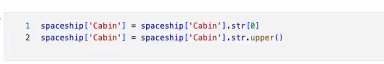

In [8]:
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- Drop PassengerId and Name

we are dropping them because they are all unique, and our model cant use them for anything

In [9]:
#your code here
spaceship.drop(['PassengerId', 'Name'], axis=1, inplace= True)

In [10]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   object 
 2   Cabin         6606 non-null   object 
 3   Destination   6606 non-null   object 
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   object 
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 625.8+ KB


- For non-numerical columns, do dummies.

In [11]:
#your code here
spaceship = pd.get_dummies(spaceship, columns=["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"])

In [12]:
spaceship.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False


In [13]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6606 non-null   float64
 1   RoomService                6606 non-null   float64
 2   FoodCourt                  6606 non-null   float64
 3   ShoppingMall               6606 non-null   float64
 4   Spa                        6606 non-null   float64
 5   VRDeck                     6606 non-null   float64
 6   Transported                6606 non-null   bool   
 7   HomePlanet_Earth           6606 non-null   bool   
 8   HomePlanet_Europa          6606 non-null   bool   
 9   HomePlanet_Mars            6606 non-null   bool   
 10  CryoSleep_False            6606 non-null   bool   
 11  CryoSleep_True             6606 non-null   bool   
 12  Cabin_A                    6606 non-null   bool   
 13  Cabin_B                    6606 non-null   bool   
 1

In [14]:
spaceship.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object')

**Perform Train Test Split**

In [15]:
#your code here
features = spaceship.drop(columns = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'])
target = spaceship["Transported"]

In [16]:
x_tr, x_t, y_tr, y_t = train_test_split(features, target, test_size=0.20, random_state=0)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [17]:
spaceship

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,True,False,False,...,False,False,False,True,False,False,False,True,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [18]:
math.sqrt(6606)

81.2773031048644

In [19]:
#your code here
knn = KNeighborsRegressor(n_neighbors=81)

In [20]:
knn.fit(x_tr,y_tr)

KNeighborsRegressor(n_neighbors=81)

- Evaluate your model's performance. Comment it

# Before method with n = 10

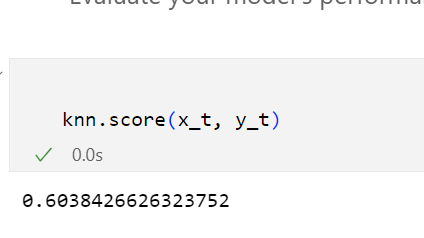

# After

In [21]:

knn.score(x_t, y_t)

0.45800253226960497